In [12]:
#### https://length.com/c/cce21c62-24ae-4ed2-9780-a3c1a0afdcdc

Using device: mps
Epoch 1, Loss: 2240.3670859375
Epoch 2, Loss: -2895.112154296875
Epoch 3, Loss: -2123.7335625
Epoch 4, Loss: -2738.742390625
Epoch 5, Loss: -3063.410015625
Epoch 6, Loss: -3209.515578125
Epoch 7, Loss: -3327.0761328125
Epoch 8, Loss: -3739.86146875
Epoch 9, Loss: -3821.566296875
Epoch 10, Loss: -3893.4038046875
Epoch 11, Loss: -4214.470828125
Epoch 12, Loss: -4476.052890625
Epoch 13, Loss: -4718.152078125
Epoch 14, Loss: -5045.839234375
Epoch 15, Loss: -5337.2725
Epoch 16, Loss: -5618.152609375
Epoch 17, Loss: -5863.08375
Epoch 18, Loss: -6032.4539375
Epoch 19, Loss: -6363.875390625
Epoch 20, Loss: -6646.441828125
Epoch 21, Loss: -6727.6668125
Epoch 22, Loss: -7017.3519375
Epoch 23, Loss: -7130.6629375
Epoch 24, Loss: -7392.772
Epoch 25, Loss: -7648.36396875
Epoch 26, Loss: -7767.2126875
Epoch 27, Loss: -7898.2571875
Epoch 28, Loss: -8035.70440625
Epoch 29, Loss: -8275.7303125
Epoch 30, Loss: -8481.69265625


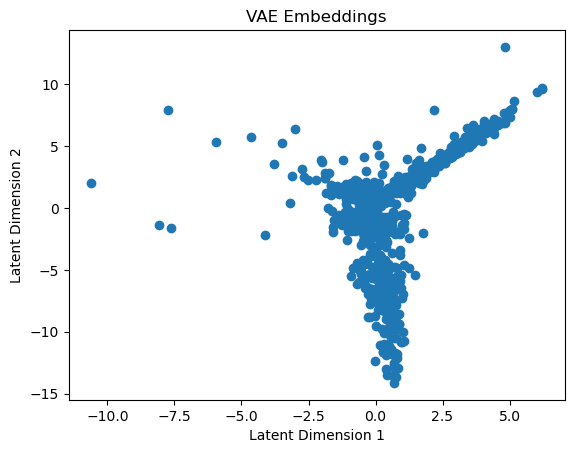

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        
        # Encoder layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # Second layer
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)  # Third layer
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)  # Fourth layer
        self.fc5_mean = nn.Linear(hidden_dim, latent_dim)  # Mean layer
        self.fc5_logvar = nn.Linear(hidden_dim, latent_dim)  # Log variance layer

        # Decoder layers
        self.fc6 = nn.Linear(latent_dim, hidden_dim)  # First decoder layer
        self.fc7 = nn.Linear(hidden_dim, hidden_dim)  # Second decoder layer
        self.fc8 = nn.Linear(hidden_dim, hidden_dim)  # Third decoder layer
        self.fc9 = nn.Linear(hidden_dim, hidden_dim)  # Fourth decoder layer
        self.fc10 = nn.Linear(hidden_dim, input_dim)  # Output layer

    def encode(self, x):
        # Apply the encoder layers with ReLU activations
        h1 = torch.relu(self.fc1(x))
        h2 = torch.relu(self.fc2(h1))
        h3 = torch.relu(self.fc3(h2))
        h4 = torch.relu(self.fc4(h3))
        # Return mean and log variance for reparameterization
        return self.fc5_mean(h4), self.fc5_logvar(h4)

    def reparameterize(self, mu, logvar):
        # Reparameterization trick to sample from N(mu, var)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        # Apply the decoder layers with ReLU activations
        h6 = torch.relu(self.fc6(z))
        h7 = torch.relu(self.fc7(h6))
        h8 = torch.relu(self.fc8(h7))
        h9 = torch.relu(self.fc9(h8))
        # Return the reconstructed input
        return torch.sigmoid(self.fc10(h9))

    def forward(self, x):
        # Encode input to get mean and log variance
        mu, logvar = self.encode(x)
        # Sample from the latent space
        z = self.reparameterize(mu, logvar)
        # Decode the latent space to reconstruct input
        return self.decode(z), mu, logvar

def loss_function(recon_x, x, mu, logvar):
    # Reconstruction loss
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    # KL divergence loss
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    # Total VAE loss
    return BCE + KLD

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Generate toy data
N = 1000  # Number of subjects
input_dim = 10000  # Number of features (genes)
hidden_dim = 512  # Dimension of hidden layers
latent_dim = 2  # Dimension of the latent space

# Create random toy data
data = np.random.randn(N, input_dim).astype(np.float32)
dataset = TensorDataset(torch.tensor(data))
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

# Initialize the model, optimizer, and move model to device
model = VAE(input_dim, hidden_dim, latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Train the VAE
epochs = 30
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data_batch,) in enumerate(dataloader):
        # Move data to the device
        data_batch = data_batch.to(device)
        optimizer.zero_grad()
        # Forward pass
        recon_batch, mu, logvar = model(data_batch)
        # Compute loss
        loss = loss_function(recon_batch, data_batch, mu, logvar)
        # Backward pass
        loss.backward()
        train_loss += loss.item()
        # Optimize
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(dataloader.dataset)}")

# Extract and visualize the embeddings
model.eval()
with torch.no_grad():
    data_tensor = torch.tensor(data).to(device)  # Use the full dataset
    mu, logvar = model.encode(data_tensor)
    z = model.reparameterize(mu, logvar)

# Move embeddings to CPU and plot
z = z.cpu().numpy()
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("VAE Embeddings")
plt.show()

# Save the model
torch.save(model.state_dict(), "vae_model.pth")


## Load and Continue Training


Additional Epoch 1, Loss: -7898.040125
Additional Epoch 2, Loss: -8556.8059375
Additional Epoch 3, Loss: -8951.48121875
Additional Epoch 4, Loss: -9327.39846875
Additional Epoch 5, Loss: -9678.83196875
Additional Epoch 6, Loss: -9979.66134375
Additional Epoch 7, Loss: -10288.099
Additional Epoch 8, Loss: -10565.950625
Additional Epoch 9, Loss: -10881.0895625
Additional Epoch 10, Loss: -11283.847
Additional Epoch 11, Loss: -11575.3271875
Additional Epoch 12, Loss: -11778.50565625
Additional Epoch 13, Loss: -12069.77840625
Additional Epoch 14, Loss: -12280.03146875
Additional Epoch 15, Loss: -12438.1116875
Additional Epoch 16, Loss: -12844.338875
Additional Epoch 17, Loss: -13099.020875
Additional Epoch 18, Loss: -13282.84028125
Additional Epoch 19, Loss: -13700.88859375
Additional Epoch 20, Loss: -13663.5434375
Additional Epoch 21, Loss: -14354.0231875
Additional Epoch 22, Loss: -14418.0565
Additional Epoch 23, Loss: -14777.314125
Additional Epoch 24, Loss: -14864.6684375
Additional Epo

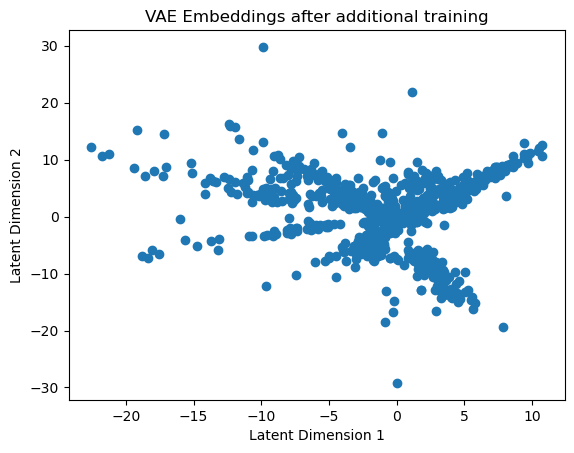

In [7]:
# Load the model and move it to the device
loaded_model = VAE(input_dim, hidden_dim, latent_dim).to(device)
loaded_model.load_state_dict(torch.load("vae_model.pth"))
optimizer = optim.Adam(loaded_model.parameters(), lr=1e-3)

# Continue training for additional 30 epochs
additional_epochs = 30
for epoch in range(additional_epochs):
    loaded_model.train()
    train_loss = 0
    for batch_idx, (data_batch,) in enumerate(dataloader):
        # Move data to the device
        data_batch = data_batch.to(device)
        optimizer.zero_grad()
        # Forward pass
        recon_batch, mu, logvar = loaded_model(data_batch)
        # Compute loss
        loss = loss_function(recon_batch, data_batch, mu, logvar)
        # Backward pass
        loss.backward()
        train_loss += loss.item()
        # Optimize
        optimizer.step()

    print(f"Additional Epoch {epoch + 1}, Loss: {train_loss / len(dataloader.dataset)}")

# Extract and visualize the embeddings again
loaded_model.eval()
with torch.no_grad():
    data_tensor = torch.tensor(data).to(device)  # Use the full dataset
    mu, logvar = loaded_model.encode(data_tensor)
    z = loaded_model.reparameterize(mu, logvar)

# Move embeddings to CPU and plot
z = z.cpu().numpy()
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("VAE Embeddings after additional training")
plt.show()

# Save the model again if needed
torch.save(loaded_model.state_dict(), "vae_model_trained.pth")


In [8]:
len(z[:, 0])

1000

Additional Epoch 1, Loss: -15796.428
Additional Epoch 2, Loss: -16236.932
Additional Epoch 3, Loss: -17010.022625
Additional Epoch 4, Loss: -17547.2273125
Additional Epoch 5, Loss: -17965.395
Additional Epoch 6, Loss: -18273.1289375
Additional Epoch 7, Loss: -18639.89825
Additional Epoch 8, Loss: -18872.476875
Additional Epoch 9, Loss: -19309.7334375
Additional Epoch 10, Loss: -19466.670125
Additional Epoch 11, Loss: -19837.27875
Additional Epoch 12, Loss: -20350.2454375
Additional Epoch 13, Loss: -20410.894125
Additional Epoch 14, Loss: -20883.9360625
Additional Epoch 15, Loss: -21169.677875
Additional Epoch 16, Loss: -21553.5345625
Additional Epoch 17, Loss: -21755.777
Additional Epoch 18, Loss: -22150.785875
Additional Epoch 19, Loss: -22788.648625
Additional Epoch 20, Loss: -22842.3078125
Additional Epoch 21, Loss: -23578.9221875
Additional Epoch 22, Loss: -23768.4743125
Additional Epoch 23, Loss: -24149.0824375
Additional Epoch 24, Loss: -24306.416875
Additional Epoch 25, Loss: -2

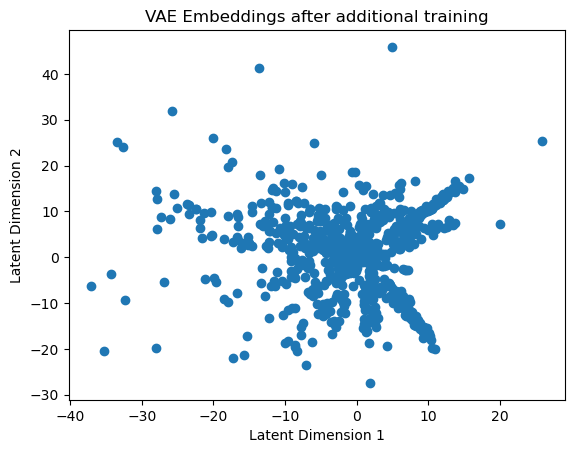

In [9]:
# Load the model and move it to the device
loaded_model = VAE(input_dim, hidden_dim, latent_dim).to(device)
loaded_model.load_state_dict(torch.load("vae_model_trained.pth"))
optimizer = optim.Adam(loaded_model.parameters(), lr=1e-3)

# Continue training for additional 30 epochs
additional_epochs = 30
for epoch in range(additional_epochs):
    loaded_model.train()
    train_loss = 0
    for batch_idx, (data_batch,) in enumerate(dataloader):
        # Move data to the device
        data_batch = data_batch.to(device)
        optimizer.zero_grad()
        # Forward pass
        recon_batch, mu, logvar = loaded_model(data_batch)
        # Compute loss
        loss = loss_function(recon_batch, data_batch, mu, logvar)
        # Backward pass
        loss.backward()
        train_loss += loss.item()
        # Optimize
        optimizer.step()

    print(f"Additional Epoch {epoch + 1}, Loss: {train_loss / len(dataloader.dataset)}")

# Extract and visualize the embeddings again
loaded_model.eval()
with torch.no_grad():
    data_tensor = torch.tensor(data).to(device)  # Use the full dataset
    mu, logvar = loaded_model.encode(data_tensor)
    z = loaded_model.reparameterize(mu, logvar)

# Move embeddings to CPU and plot
z = z.cpu().numpy()
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("VAE Embeddings after additional training")
plt.show()

# Save the model again if needed
torch.save(loaded_model.state_dict(), "vae_model_trained2.pth")
